<h1>A Practical Introduction to Blockchain with Python</h1>

<p>Blockchain is arguably one of the most significant and disruptive technologies that came into existence since the inception of the Internet. It's the core technology behind Bitcoin and other crypto-currencies that drew a lot of attention in the last few years.</p>
<p>As its core, a blockchain is a distributed database that allows direct transactions between two parties without the need of a central authority. This simple yet powerful concept has great implications for various institutions such as banks, governments and marketplaces, just to name a few. Any business or organization that relies on a centralized database as a core competitive advantage can potentially be disrupted by blockchain technology.</p>
<p>Putting aside all the hype around the price of Bitcoin and other cryptocurrencies, the goal of this lab is to give you a practical introduction to blockchain technology. Sections 1 and 2 cover some core concepts behind blockchain, while section 3 shows how to implement a blockchain using Python. We will also implement 2 web applications to make it easy for end users to interact with our blockchain.</p>
<p>Please note that I'm using Bitcoin here as a medium for explaning the more general technology of "Blockchain", and most of the concepts described in this post are applicable to other blockchain use cases and crypto-currencies. </p>
<p>Below is an animated gif of the two web apps that we will build in section 3.</p>

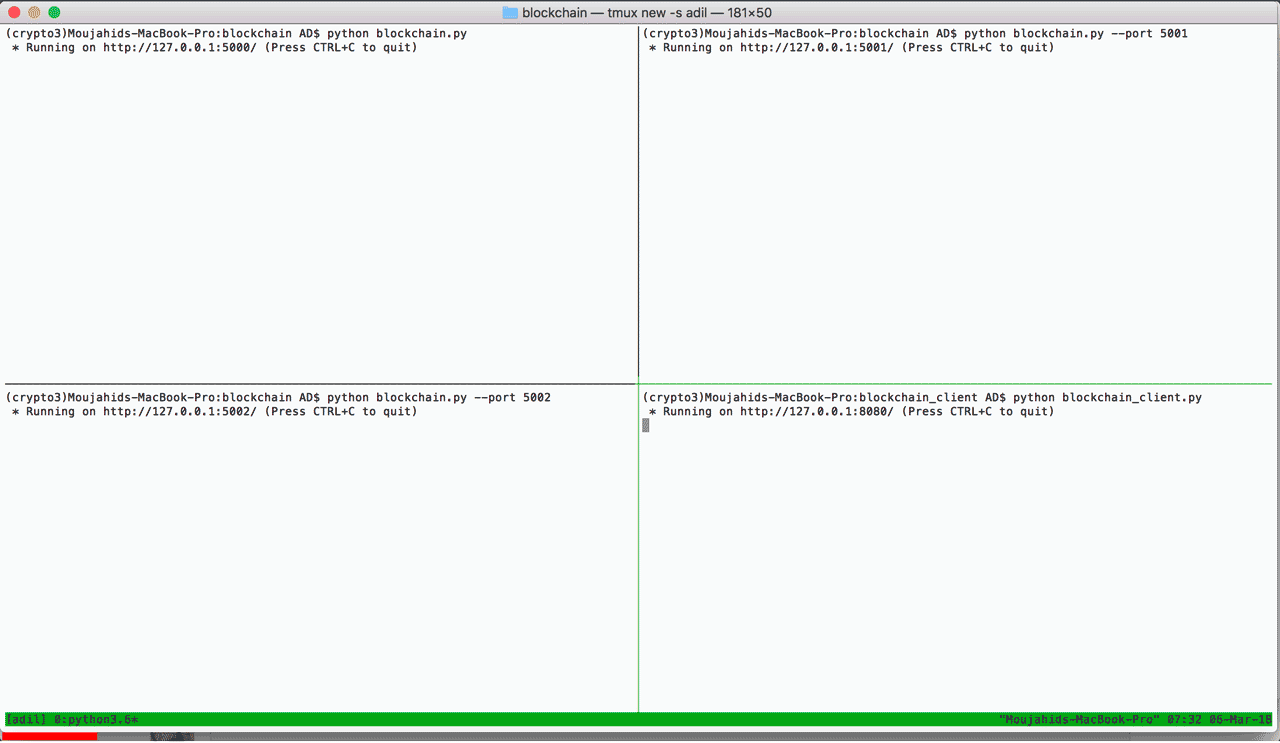

<h1>1. A Crash Course in Blockchain</h1>
<p>It all started with a white paper released in 2008 by an unknown person or entity using the name Satoshi Nakamoto. The white paper was titled <a href="https://bitcoin.org/bitcoin.pdf">“Bitcoin: A Peer-to-Peer Electronic Cash System”</a> and it laid the foundation of what later became known as Blockchain. In the original Bitcoin white paper, Satoshi described how to build a peer-to-peer electronic cash system that allows online payments to be sent directly from one party to another without going through a centralized institution. This system solves an important problem in digital money called double-spending.</p>
<h2>1.1. What is Double-Spending?</h2>
<p>Suppose that Alice wants to pay Bob 1$. If Alice and Bob use physical cash, then Alice will not longer have the 1$ after the transaction is executed. If Alice and Bob use digital money, then the problem gets more complicated. Digital money is in digital form and can be easily duplicated. If Alice sends a digital file worth 1$ to Bob by email for example, Bob cannot know for sure if Alice has deleted her copy of the file. If Alice still has the 1$ digital file, then she can choose to send the same file to Carol. This problem is called double-spending.</p>

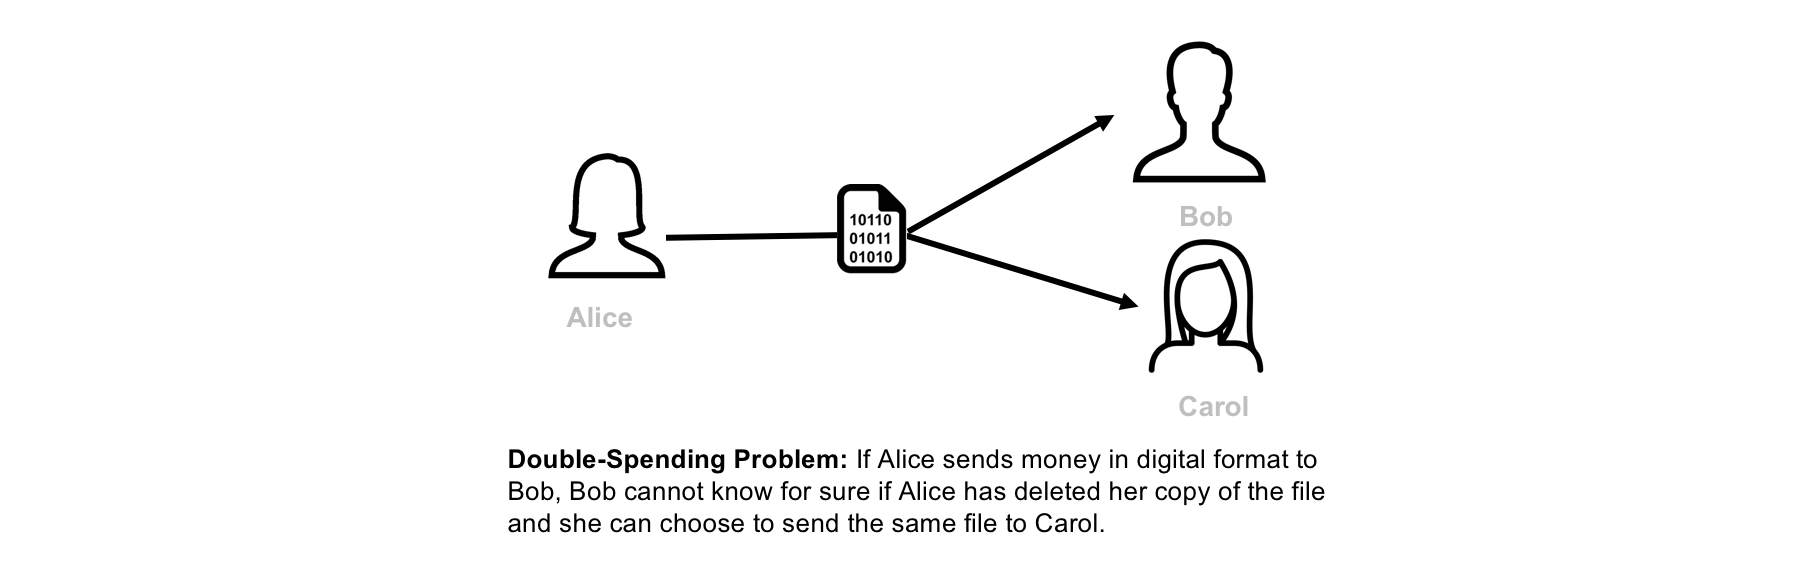

<p>One way of solving the double-spending problem is to have a trusted third party (a bank for example) between Alice, Bob and all other participants in the network. This third party is responsible for managing a centralized ledger that keeps track of and validates all the transactions in the network. The drawback of this solution is that for the system to function, it requires trust in a centralized third party.</p>
<h2>1.2. Bitcoin: A Decentralized Solution for the Double-Spending Problem</h2>
<p>To solve the double-spending problem, Satoshi proposed a public ledger, i.e., Bitcoin’s blockchain to keep track  of all transactions in the network. Bitcoin’s blockchain has the following characteristics:</p>
<ul>
<li>Distributed:  The ledger is replicated across a number of computers, rather than being stored on a central server. Any computer with an internet connection can download a full copy of the blockchain.</li>
<li>Cryptographic: Cryptography is used to make sure that the sender owns the bitcoin that she's trying to send, and to decide how the transactions are added to the blockchain.</li>
<li>Immutable: The blockchain can be changed in append only fashion. In other words, transactions can only be added to the blockchain but cannot be deleted or modified. </li>
<li>Uses Proof of Work (PoW): A special type of participants in the network called miners compete on searching for the solution to a cryptographic puzzle that will allow them to add a block of transactions to Bitcoin’s blockchain. This process is called Proof of Work and it allows the system to be secure (more on this later).</li>
</ul>

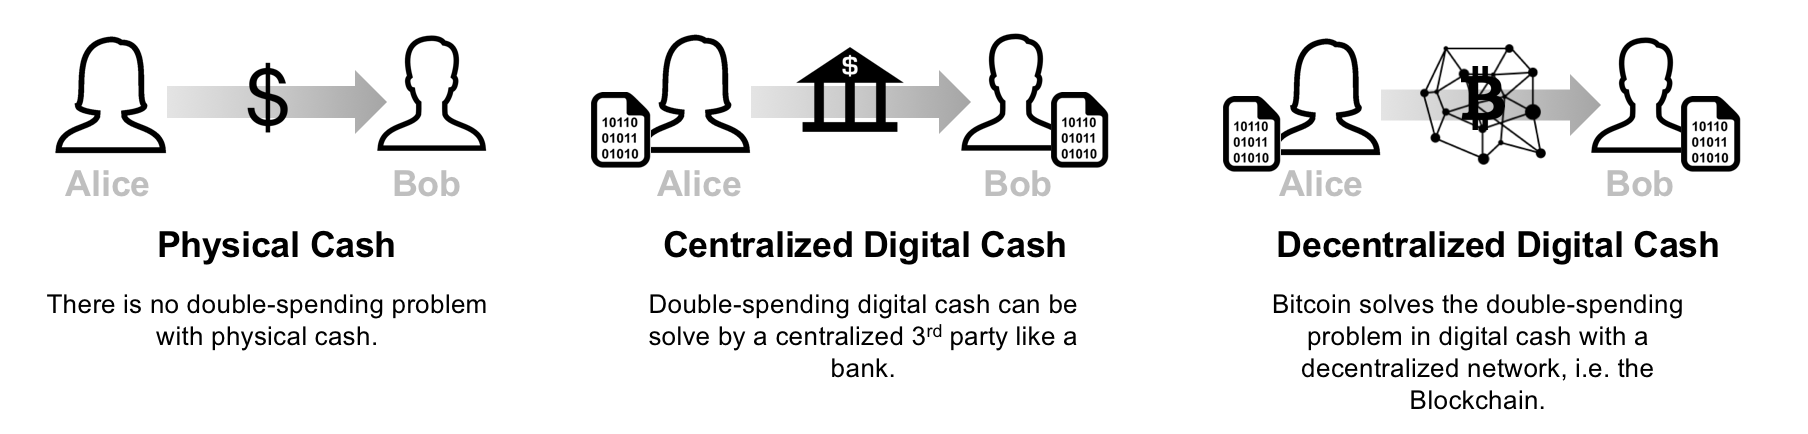

<p>Sending bitcoin money goes as follows: </p>
<ul>
<li>Step 1 (one-time effort): Create a bitcoin wallet. For a person to send or receive bitcoins, she needs to create a bitcoin wallet. A bitcoin wallet stores 2 pieces of information: A private key and a public key. The private key is a secret number that allows the owner to send bitcoin to another user, or spend bitcoins on services that accept them as payment method. The public key is a number that is needed to receive bitcoins. The public key is also referred to as bitcoin address (not entirely true, but for simplicity we will assume that the public key and the bitcoin address are the same). Note that the wallet doesn’t store the bitcoins themselves. Information about bitcoins balances are stored on the Bitcoin’s blockchain. </li>
<li>Step 2: Create a bitcoin transaction. If Alice wants to send 1 BTC to Bob, Alice needs to connect to her bitcoin wallet using her private key, and create a transaction that contains the amount of bitcoins she wants to send and the address where she wants to send them (in this case Bob’s public address). </li>
<li>Step 3: Broadcast the transaction to Bitcoin’s network. Once Alice creates the bitcoin transaction, she needs to broadcast this transaction to the entire Bitcoin’s network.</li>
<li>Step 4: Confirm the transaction. A miner listening to Bitcoin’s network authenticates the transaction using Alice's public key, confirms that Alice has enough bitcoins in her wallet (in this case at least 1 BTC), and adds a new record to Bitcoin’s Blockchain containing the details of the transaction. </li>
<li>Step 5: Broadcast the blockchain change to all miners. Once the transaction is confirmed, the miner should broadcast the blockchain change to all miners to make sure that their copies of the blockchain are all in sync.</li>
</ul>
<h1>2. A Technical Deep Dive on Blockchain</h1>
<p>The goal of this section is to go deeper into the technical building blocks that power the blockchain. We will cover public key cryptography, hashing functions, mining and security of the blockchain.</p>
<h2>2.1. Public Key Cryptography</h2>
<p>Public-key cryptography, or asymmetrical cryptography, is any cryptographic system that uses pairs of keys: public keys which may be disseminated widely, and private keys which are known only to the owner. This accomplishes two functions: authentication, where the public key verifies a holder of the paired private key sent the message, and encryption, where only the paired private key holder can decrypt the message encrypted with the public key. [1]</p>
<p><a href="https://en.wikipedia.org/wiki/RSA_(cryptosystem)">RSA</a> and <a href="https://en.wikipedia.org/wiki/Elliptic_Curve_Digital_Signature_Algorithm">Elliptic Curve Digital Signature (ECDSA)</a> are the most popular public-key cryptography algorithms. </p>
<p>In the case of Bitcoin, ECDSA algorithm is used to generate Bitcoin wallets. Bitcoin uses a variety of keys and addresses, but for the sake of simplicity, we will assume in this lab that each Bitcoin wallet has one pair of private/public keys and that a Bitcoin address is the wallet's public key. I recommend this <a href="https://en.bitcoin.it/wiki/Technical_background_of_version_1_Bitcoin_addresses">article</a>, if you're interested in the complete technical details of Bitcoin wallets. </p>
<p>To send or receive BTCs, a user starts by generating a wallet which contains a pair of private and public keys. If Alice wants to send Bob some BTCs, she creates a transaction in which she enters both her and Bob's public keys, and the amount of BTCs she wants to send. She then sign the transaction using her private key. A computer on the blockchain uses Alice's public key to verify that the transaction is authentic and adds the transaction to a block that will be later added to the blockchain. </p>


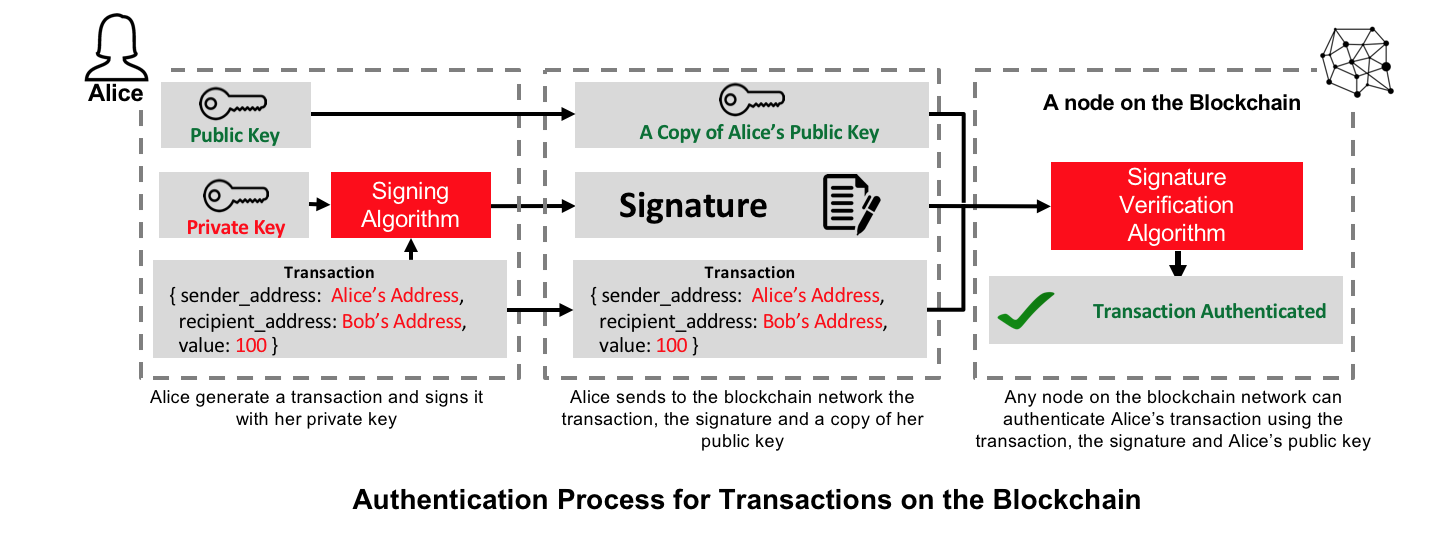

<h2>2.2. Hashing Functions and Mining</h2>
<p>All Bitcoin transactions are grouped in files called blocks.  Bitcoin adds a new block of transactions every 10 minutes. Once a new block is added to the blockchain, it becomes immutable and can't be deleted or modified.
A special group of participants in the network called miners (computers connected to the blockchain) are responsible for creating new blocks of transactions. A miner has to authenticate each transaction using the sender's public key, confirm that the sender has enough balance for the requested transaction, and add the transaction to the block. 
Miners are completely free to choose which transactions to include in the blocks, therefore the senders need to include a transaction fee to incentivise the miners to add their transactions to the blocks. </p>
<p>For a block to be accepted by the blockchain, it needs to be "mined". To mine a block, miners need to find an extremely rare solution to a cryptographic puzzle. If a mined block is accepted by the blockchain, the miner receive a reward in bitcoins which is an additional incentive to transaction fees. The mining process is also referred to as Proof of Work (PoW), and it's the main mechanism that enables the blockchain to be trustless and secure (more on blockchain security later).</p>
<h3>Hashing and Blockchain's Cryptographic Puzzle</h3>
<p>To understand the blockchain's cryptographic puzzle, we need to start with hash functions. A hash function is any function that can be used to map data of arbitrary size to data of fixed size. The values returned by a hash function are called hashes. Hash functions are usually used to accelerate database lookup by detecting duplicated records, and they are also widely used in cryptography.  A cryptographic hash function allows one to easily verify that some input data maps to a given hash value, but if the input data is unknown, it is deliberately difficult to reconstruct it by knowing the stored hash value. [2]</p>
<p>Bitcoins uses a cryptographic hash function called SHA-256. SHA-256 is applied to a combination of the block's data (bitcoin transactions) and a number called nonce. By changing the block data or the nonce, we get completely different hashes. For a block to be considered valid or "mined", the hash value of the block and the nonce needs to meet a certain condition. For example, the four leading digits of the hash needs to be equal to "0000". We can increase the mining complexity by making the condition more complex, for example we can increase the number of 0s that the hash value needs to start with.</p>
<p>The cryptograhic puzzle that miners need to solve is to find a nonce value that makes the hash value satisfies the mining condition. You can use the <a href="https://andersbrownworth.com/blockchain/block">Block App</a> to simulate block mining. When you type in the "Data" text box or change the nonce value, you can notice the change in the hash value. When you click the "Mine" button, the app starts with a nonce equals to zero, computes the hash value and checks if the leading four digits of the hash value is equal to "0000". If the leading  four digits are not equal to "0000", it increments the nonce by one and repeats the whole process until it finds a nonce value that satisify the condition. If the block is considered mined, the background color turns green.</p>


<h2>2.3. From Blocks to Blockchain</h2>
<p>As discussed in the previous section, transactions are grouped in blocks and blocks are appended to the blockchain. In order to create a chain of blocks, each new block uses the previous block’s hash as part of its data. To create a new block, a miner selects a set of transactions, adds the previous block’s hash and mines the block in a similar fashion described above. </p>
<p>Any changes to the data in any block will affect all the hash values of the blocks that come after it and they will become invalid. This give the blockchain its immutability characteristic. </p>


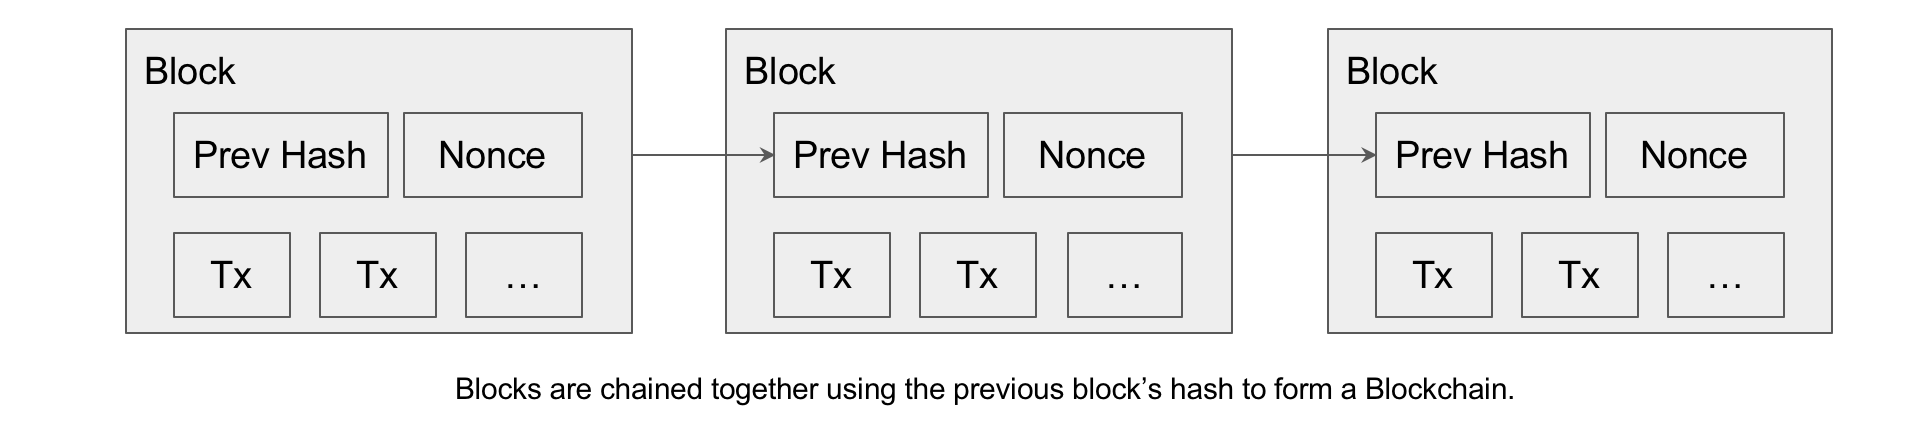

<p>You can use the <a href="https://andersbrownworth.com/blockchain/blockchain">Blockchain APP</a> to simulate a blockchain with 5 blocks. When you type in the "Data" text box or change the nonce value, you can notice the change in the hash value and the "Prev" value (previous hash) of the next block. You can simulate the mining process by clicking on the “Mine” button of each individual block. After mining the 3 blocks, try changing the data in block 1 or 2, and you will notice that all the blocks that come after become invalid.</p>

<h2>2.4. Adding Blocks to the Blockchain</h2>
<p>All the miners in the Bitcoin network compete with each other to find a valid block that will be added to the blockchain and get the reward from the network. Finding a nonce that validated a block is rare, but because of the number of miners, the probability of a miner in the network validating a block is extremely high. The first miner to submit a valid block gets his block added to the blockchain and receives the reward in bitcoins. But what happens if two miners or more submit their blocks at the same time?</p>
<h3>Resolving Conflicts</h3>
<p>If 2 miners solve a block at almost the same time, then we will have 2 different blockchains in the network, and we need to wait for the next block to resolve the conflict. Some miners will decide to mine on top of blockchain 1 and others on top of blockchain 2. The first miner to find a new block resolves the conflict. If the new block was mined on top of blockchain 1, then blockchain 2 becomes invalid, the reward of the previous block goes to the miner from blockchain 1 and the transactions that were part of blockchain 2 and weren’t added to the blockchain go back to the transactions pool and get added to the next blocks. In short, if there is a conflict on the blockchain, then the the longest chain wins.</p>


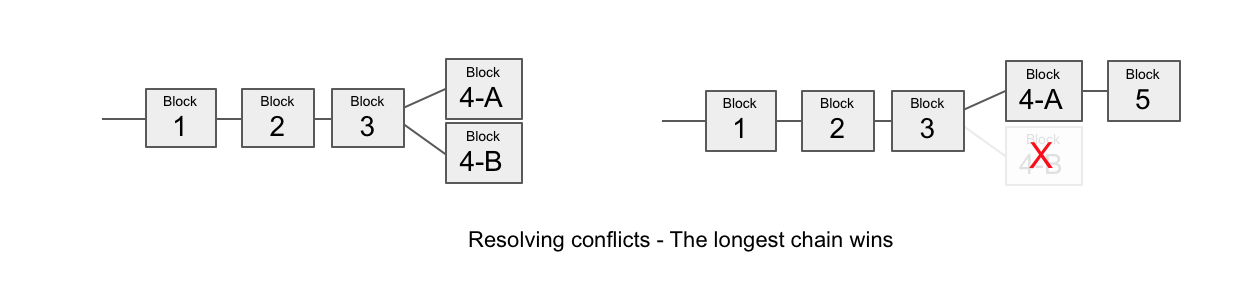

<h2>2.5. Blockchain and Double-Spending</h2>
<p>In this section, we will cover the most popular ways for performing double-spending attacks on the blockchain, and the measures that users should take to prevent damages from them.</p>
<h3>Race Attack</h3>
<p>An attacker sends the same coin in rapid succession to two different addresses. To prevent from this attack, it is recommended to wait for at least one block confirmation before accepting the payment. [3]</p>
<h3>Finney Attack</h3>
<p>An attacker pre-mines a block with a transaction, and spends the same coins in a second transaction before releasing the block. In this scenario, the second transaction will not be validated. To prevent from this attack, it is recommended to wait for at least 6 block confirmations before accepting the payment. [3] </p>
<h3>Majority Attack (also called 51% attack)</h3>
<p>In this attack, the attacker owns 51% of the computing power of the network. The attacker starts by making a transaction that is brodcasted to the entire network, and then mines a private blockchain where he double-spends the coins of the previous transaction. Since the attacker owns the majority of the computing power, he is guaranteed that he will have at some point a longer chain than the "honest" network. He can then release his longer blockchain that will replace the "honest" blockchain and cancel the original transaction. This attack is highly unlikely, as it’s very expensive in blockchain networks like Bitcoin. [4]</p>


<h1>3. A Blockchain Implementation in Python</h1>
<p>In this section, we will implement a basic blockchain and a blockchain client using Python. Our blockchain will have the following features:</p>
<ul>
<li>Possibility of adding multiple nodes to the blockchain</li>
<li>Proof of Work (PoW)</li>
<li>Simple conflict resolution between nodes</li>
<li>Transactions with RSA encryption</li>
</ul>
<p>Our blockchain client will have the following features:</p>
<ul>
<li>Wallets generation using Public/Private key encryption (based on RSA algorithm)</li>
<li>Generation of transactions with RSA encryption </li>
</ul>
<p>We will also implement 2 dashboards: </p>
<ul>
<li>"Blockchain Frontend" for miners </li>
<li>"Blockchain Client" for users to generate wallets and send coins </li>
</ul>
<p>The blockchain implementation is mostly based on this <a href="https://github.com/dvf/blockchain">github project</a>. I made a few modifications to the original code in order to add RSA encryption to the transactions. Wallet generation and transaction encryption is based on this <a href="https://github.com/julienr/ipynb_playground/blob/master/bitcoin/dumbcoin/dumbcoin.ipynb">Jupyter notebook</a>. The 2 dashboard are implemented from scratch using HTML/CSS/JS.</p>
<p>You can download the complete source code from <a href="https://github.com/adilmoujahid/blockchain-python-tutorial">https://github.com/adilmoujahid/blockchain-python-tutorial</a>.</p>
<p>Please note that this implementation is for educational purposes only and shouldn't be use in production as it doesn't have good security, doesn't scale well and lacks many important features.</p>
<h2>3.1. Blockchain Client Implementation</h2>
<p>You can start the blockchain client from the terminal by going to the <code>blockchain_client</code> folder</p>


1) Open Anaconda Prompt in the Start menu

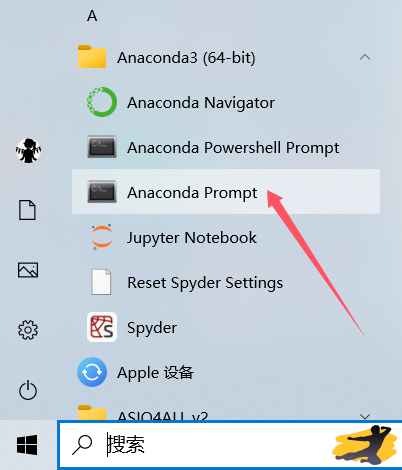

2) Input "pip install pycryptodome" to install the pycryptodome library

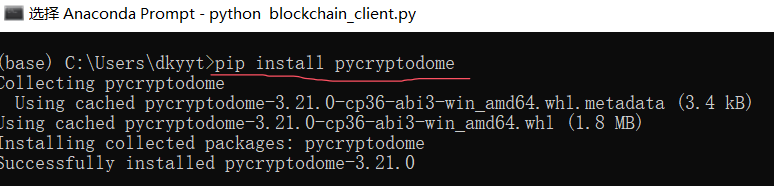

3) Enter blockchain_client folder, click on the address bar and copy the folder path

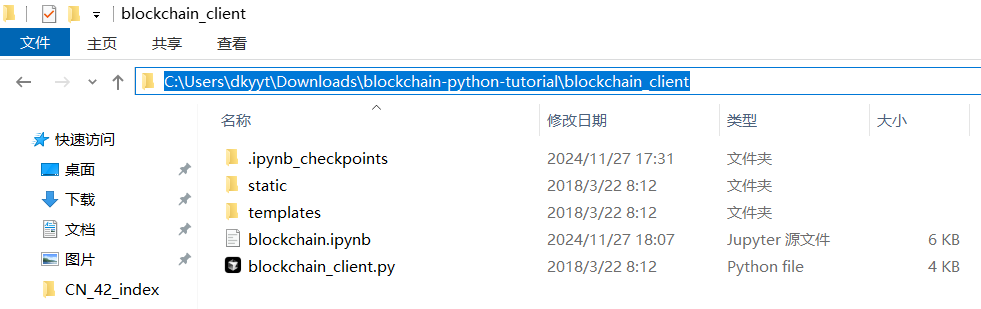

4. Input "cd" and space key, press "ctrl V" to paste the copied folder path, then press enter key.

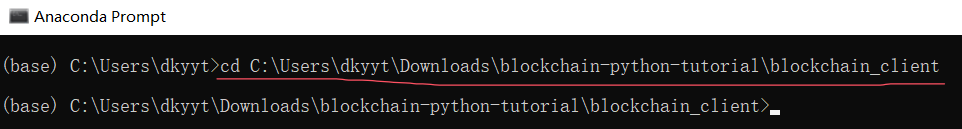

5) typing <code>python blockchain_client.py</code>. 

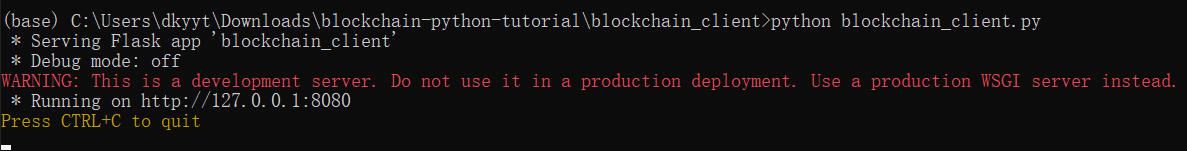

6) In your browser, go to <code>http://localhost:8080</code> and you'll see the dashboard below.</p>

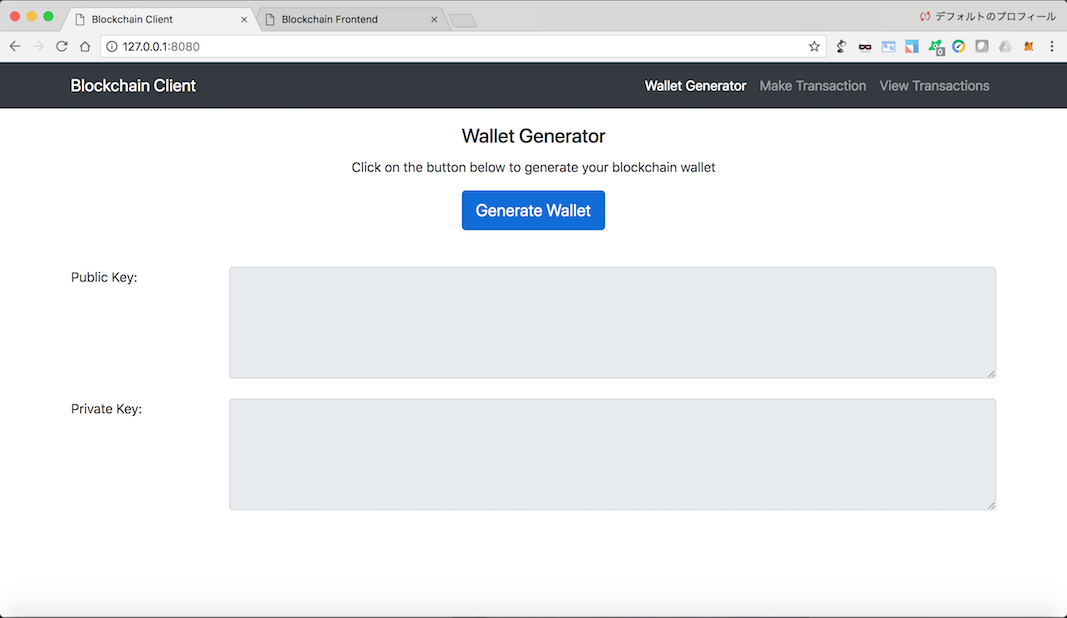

<p>The dashboard has 3 tabs in the navigation bar:</p>
<ul>
<li>Wallet Generator: To generate wallets (Public/Private keys pair) using RSA encryption algorithm</li>
<li>Make Transaction: To generate transactions and send them to a blockchain node</li>
<li>View Transasctions: To view the transactions that are on the blockchain</li>
</ul>
<p>In order to make or view transactions, you will need at least one blockchain node running (to be covered in next section).</p>
<p>Below is some explanation of the most important parts in the <code>blockchain_client.py</code> code.</p>
<p>We define a python class that we name <code>Transaction</code> that has 4 attributes <code>sender_address</code>, <code>sender_private_key</code>, <code>recipient_address</code>, <code>value</code>. These are the 4 pieces of information that a sender needs to create a transaction. </p>
<p>The <code>to_dict()</code> method returns the transaction information in a Python dictionary format (without the sender's private key). The <code>sign_transaction()</code> method takes the transaction information (without the sender's private key) and signs it using the sender's private key.</p>


In [ ]:
class Transaction:

    def __init__(self, sender_address, sender_private_key, recipient_address, value):
        self.sender_address = sender_address
        self.sender_private_key = sender_private_key
        self.recipient_address = recipient_address
        self.value = value

    def __getattr__(self, attr):
        return self.data[attr]

    def to_dict(self):
        return OrderedDict({'sender_address': self.sender_address,
                            'recipient_address': self.recipient_address,
                            'value': self.value})

    def sign_transaction(self):
        """
        Sign transaction with private key
        """
        private_key = RSA.importKey(binascii.unhexlify(self.sender_private_key))
        signer = PKCS1_v1_5.new(private_key)
        h = SHA.new(str(self.to_dict()).encode('utf8'))
        return binascii.hexlify(signer.sign(h)).decode('ascii')

<p>The line below initate a <code>Python Flask</code> app that we will use to create different APIs to interact with the blockchain and its client.</p>


In [ ]:
app = Flask(__name__)

<p>Below we define the 3 <code>Flask</code> routes that returns html pages. One html page for each tab.</p>


In [ ]:
@app.route('/')
def index():
  return render_template('./index.html')

@app.route('/make/transaction')
def make_transaction():
    return render_template('./make_transaction.html')

@app.route('/view/transactions')
def view_transaction():
    return render_template('./view_transactions.html')

<p>Below we define an API that generates wallets (Private/Public keys pairs).</p>


In [ ]:
@app.route('/wallet/new', methods=['GET'])
def new_wallet():
  random_gen = Crypto.Random.new().read
  private_key = RSA.generate(1024, random_gen)
  public_key = private_key.publickey()
  response = {
    'private_key': binascii.hexlify(private_key.exportKey(format='DER')).decode('ascii'),
    'public_key': binascii.hexlify(public_key.exportKey(format='DER')).decode('ascii')
  }

  return jsonify(response), 200

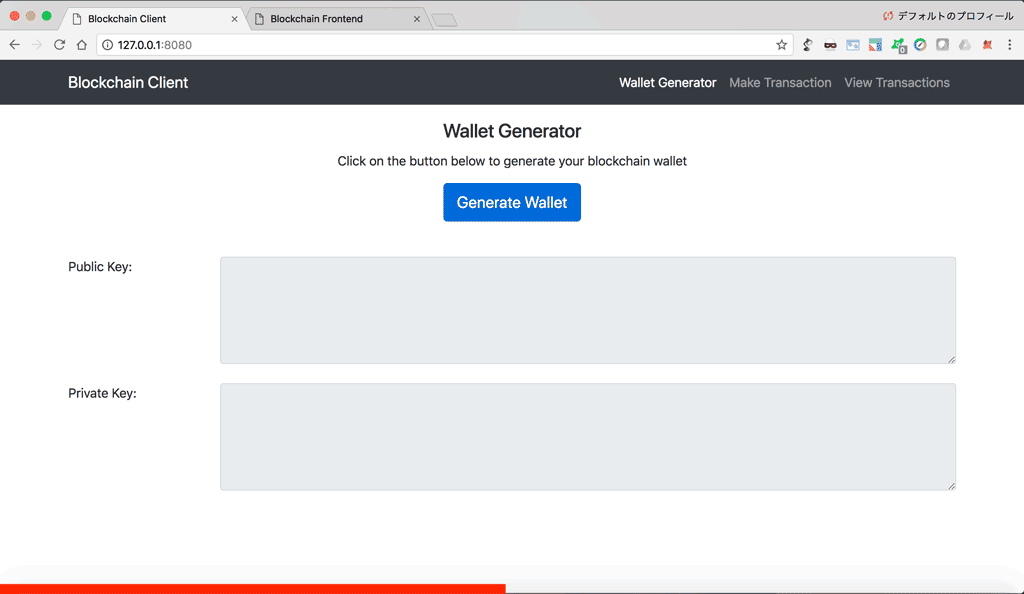

<p>Below we define an API that takes as input <code>sender_address</code>, <code>sender_private_key</code>, <code>recipient_address</code>, <code>value</code>, and returns the transaction (without private key) and the signature.</p>


In [ ]:
@app.route('/generate/transaction', methods=['POST'])
def generate_transaction():

  sender_address = request.form['sender_address']
  sender_private_key = request.form['sender_private_key']
  recipient_address = request.form['recipient_address']
  value = request.form['amount']

  transaction = Transaction(sender_address, sender_private_key, recipient_address, value)

  response = {'transaction': transaction.to_dict(), 'signature': transaction.sign_transaction()}

  return jsonify(response), 200

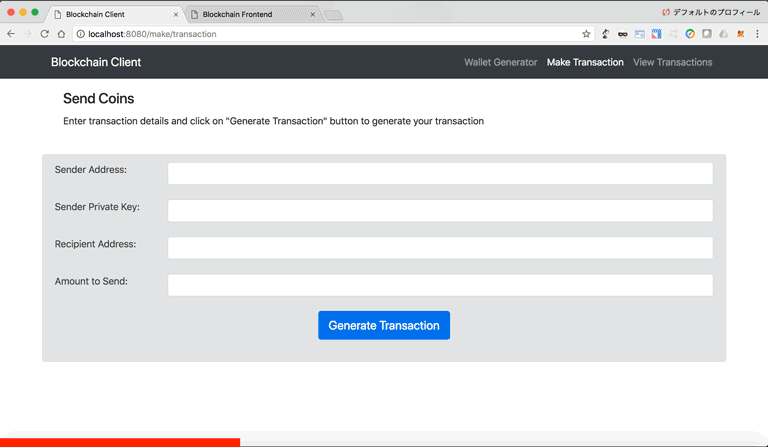

<h2>3.2. Blockchain Implementation</h2>
<p>You can start a blockchain node from the terminal by going to the <code>blockchain</code> folder, and type <code>python blockchain_client.py</code> or <code>python blockchain_client.py  -p &lt;PORT NUMBER&gt;</code>. If you don't specify a port number, it will default to port 5000. In your browser, go to <code>http://localhost:&lt;PORT NUMBER&gt;</code> to see the blockchain frontend dashboard.</p>


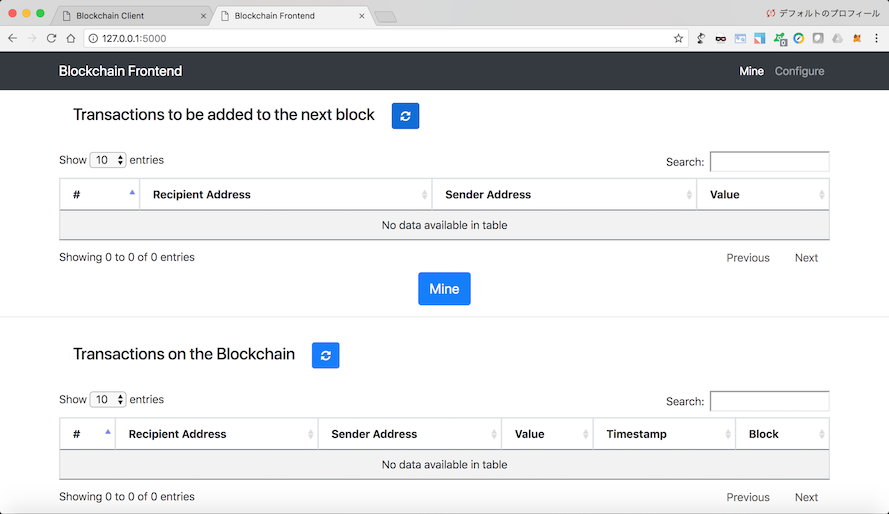

<p>The dashboard has 2 tabs in the navigation bar:</p>
<ul>
<li>Mine: For viewing transactions and blockchain data, and for mining new blocks of transactions.</li>
<li>Configure: For configuring connections between the different blockchain nodes.</li>
</ul>
<p>Below is some explanation of the most important parts in the <code>blockchain.py</code> code.</p>
<p>We start by defining a <code>Blockchain</code> class that has the following attributes:</p>
<ul>
<li><code>transactions</code>: List of transactions that will be added to the next block.</li>
<li><code>chain</code>: The actual blockchain which is an array of blocks.</li>
<li><code>nodes</code>: A set containing node urls. The blockchain uses these nodes to retrieve blockchain data from other nodes and updates its blockchain if they're not in sync.</li>
<li><code>node_id</code>: A random string to identify the blockchain node.</li>
</ul>
<p>The <code>Blockchain</code> class also implements the following methods:</p>
<ul>
<li><code>register_node(node_url)</code>: Adds a new blockchain node to the list of nodes.</li>
<li><code>verify_transaction_signature(sender_address, signature, transaction)</code>: Checks that the provided signature corresponds to transaction signed by the public key (sender_address).</li>
<li><code>submit_transaction(sender_address, recipient_address, value, signature)</code>: Adds a transaction to list of transactions if the signature verified.</li>
<li><code>create_block(nonce, previous_hash)</code>: Adds a block of transactions to the blockchain.</li>
<li><code>hash(block)</code>: Create a SHA-256 hash of a block.</li>
<li><code>proof_of_work()</code>: Proof of work algorithm. Looks for a nonce that satisfies the mining condition.</li>
<li><code>valid_proof(transactions, last_hash, nonce, difficulty=MINING_DIFFICULTY)</code>: Checks if a hash value satisfies the mining conditions. This function is used within the proof_of_work function.</li>
<li><code>valid_chain(chain)</code>: checks if a bockchain is valid.</li>
<li><code>resolve_conflicts()</code>: Resolves conflicts between blockchain's nodes by replacing a chain with the longest one in the network.</li>
</ul>

In [ ]:
class Blockchain:

    def __init__(self):

        self.transactions = []
        self.chain = []
        self.nodes = set()
        #Generate random number to be used as node_id
        self.node_id = str(uuid4()).replace('-', '')
        #Create genesis block
        self.create_block(0, '00')

    def register_node(self, node_url):
        """
        Add a new node to the list of nodes
        """
        ...

    def verify_transaction_signature(self, sender_address, signature, transaction):
        """
        Check that the provided signature corresponds to transaction
        signed by the public key (sender_address)
        """
        ...

    def submit_transaction(self, sender_address, recipient_address, value, signature):
        """
        Add a transaction to transactions array if the signature verified
        """
        ...

    def create_block(self, nonce, previous_hash):
        """
        Add a block of transactions to the blockchain
        """
        ...

    def hash(self, block):
        """
        Create a SHA-256 hash of a block
        """
        ...

    def proof_of_work(self):
        """
        Proof of work algorithm
        """
        ...

    def valid_proof(self, transactions, last_hash, nonce, difficulty=MINING_DIFFICULTY):
        """
        Check if a hash value satisfies the mining conditions. This function is used within the proof_of_work function.
        """
        ...

    def valid_chain(self, chain):
        """
        check if a bockchain is valid
        """
        ...

    def resolve_conflicts(self):
        """
        Resolve conflicts between blockchain's nodes
        by replacing our chain with the longest one in the network.
        """
        ...

<p>The line below initate a <code>Python Flask</code> app that we will use to create different APIs to interact with the blockchain.</p>


In [ ]:
app = Flask(__name__)
CORS(app)

<p>Next, we initiate a Blockchain instance.</p>

In [ ]:
blockchain = Blockchain()

<p>Below we define the 2 <code>Flask</code> routes that return the html pages for our blockchain frontend dashboard.</p>


In [ ]:
@app.route('/')
def index():
    return render_template('./index.html')

@app.route('/configure')
def configure():
    return render_template('./configure.html')

<p>Below we define <code>Flask</code> APIs to manage transactions and mining the blockchain.</p>
<ul>
<li><code>'/transactions/new'</code>: This API takes as input <code>'sender_address'</code>, <code>'recipient_address'</code>, <code>'amount'</code> and <code>'signature'</code>, and adds the transaction to the list of transactions that will be added to next block if the signature is valid.</li>
<li><code>'/transactions/get'</code>: This API returns all the transactions that will be added to the next block.</li>
<li><code>'/chain'</code>: This API returns all blockchain data.</li>
<li><code>'/mine'</code>: This API runs the proof of work algorithm, and adds the new block of transactions to the blockchain.</li>
</ul>

In [ ]:
@app.route('/transactions/new', methods=['POST'])
def new_transaction():
    values = request.form

    # Check that the required fields are in the POST'ed data
    required = ['sender_address', 'recipient_address', 'amount', 'signature']
    if not all(k in values for k in required):
        return 'Missing values', 400
    # Create a new Transaction
    transaction_result = blockchain.submit_transaction(values['sender_address'], values['recipient_address'], values['amount'], values['signature'])

    if transaction_result == False:
        response = {'message': 'Invalid Transaction!'}
        return jsonify(response), 406
    else:
        response = {'message': 'Transaction will be added to Block '+ str(transaction_result)}
        return jsonify(response), 201

@app.route('/transactions/get', methods=['GET'])
def get_transactions():
    #Get transactions from transactions pool
    transactions = blockchain.transactions

    response = {'transactions': transactions}
    return jsonify(response), 200

@app.route('/chain', methods=['GET'])
def full_chain():
    response = {
        'chain': blockchain.chain,
        'length': len(blockchain.chain),
    }
    return jsonify(response), 200

@app.route('/mine', methods=['GET'])
def mine():
    # We run the proof of work algorithm to get the next proof...
    last_block = blockchain.chain[-1]
    nonce = blockchain.proof_of_work()

    # We must receive a reward for finding the proof.
    blockchain.submit_transaction(sender_address=MINING_SENDER, recipient_address=blockchain.node_id, value=MINING_REWARD, signature="")

    # Forge the new Block by adding it to the chain
    previous_hash = blockchain.hash(last_block)
    block = blockchain.create_block(nonce, previous_hash)

    response = {
        'message': "New Block Forged",
        'block_number': block['block_number'],
        'transactions': block['transactions'],
        'nonce': block['nonce'],
        'previous_hash': block['previous_hash'],
    }
    return jsonify(response), 200

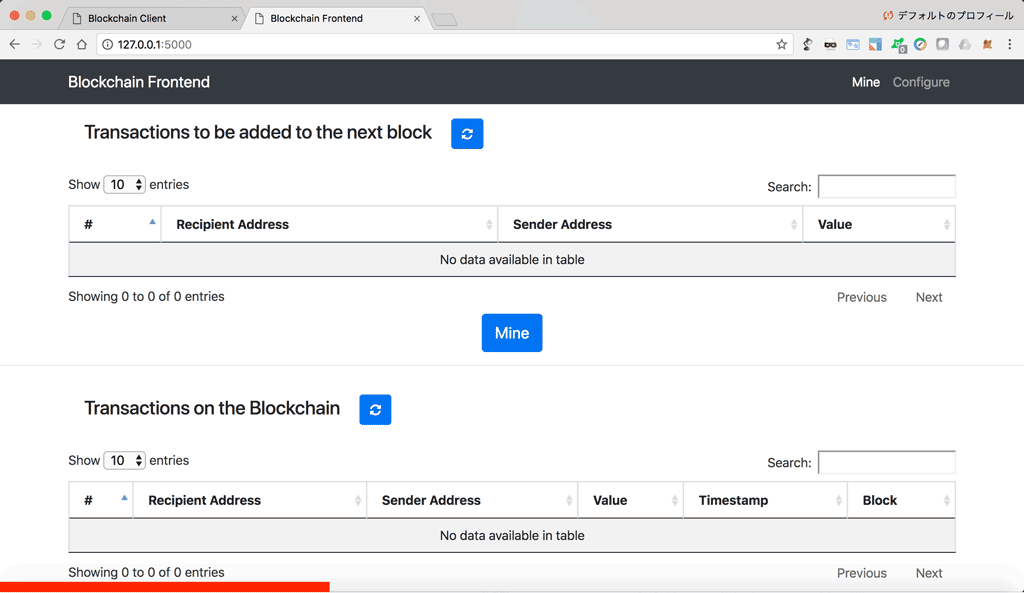

<p>Below we define Flask APIs to manage blockchain nodes.</p>
<ul>
<li><code>'/nodes/register'</code>: This API takes as input a list of node urls, and adds them to the list of nodes.</li>
<li><code>'/nodes/resolve'</code>: This API resolves conflicts between blockchain nodes by replacing a local chain with the longest one available in the network.</li>
<li><code>'/nodes/get'</code>: This API returns the list of nodes.</li>
</ul>

In [ ]:
@app.route('/nodes/register', methods=['POST'])
def register_nodes():
    values = request.form
    nodes = values.get('nodes').replace(" ", "").split(',')

    if nodes is None:
        return "Error: Please supply a valid list of nodes", 400

    for node in nodes:
        blockchain.register_node(node)

    response = {
        'message': 'New nodes have been added',
        'total_nodes': [node for node in blockchain.nodes],
    }
    return jsonify(response), 201


@app.route('/nodes/resolve', methods=['GET'])
def consensus():
    replaced = blockchain.resolve_conflicts()

    if replaced:
        response = {
            'message': 'Our chain was replaced',
            'new_chain': blockchain.chain
        }
    else:
        response = {
            'message': 'Our chain is authoritative',
            'chain': blockchain.chain
        }
    return jsonify(response), 200


@app.route('/nodes/get', methods=['GET'])
def get_nodes():
    nodes = list(blockchain.nodes)
    response = {'nodes': nodes}
    return jsonify(response), 200

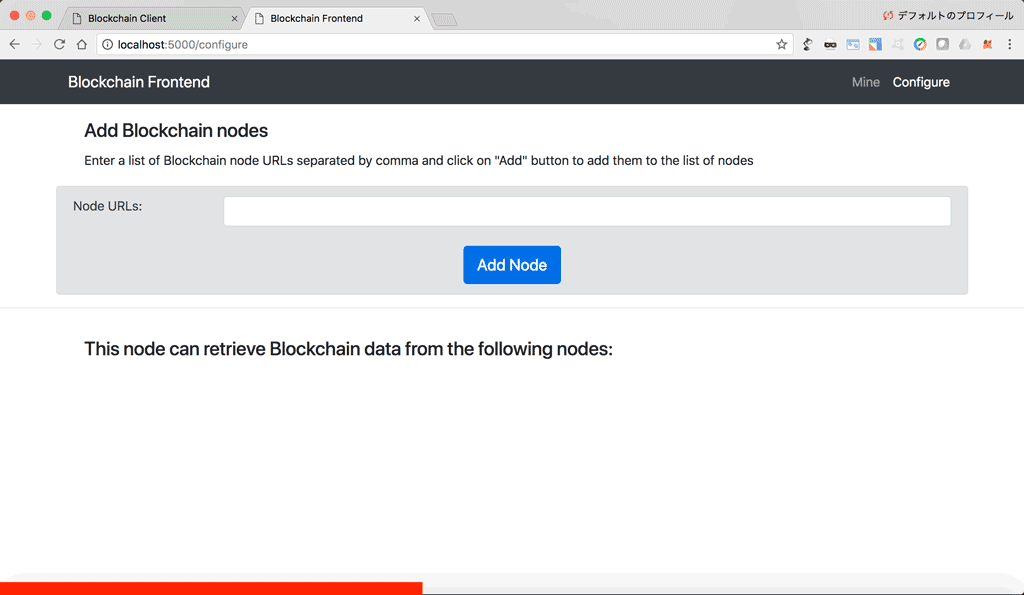

<h1>Conclusion</h1>
<p>In this lab, we covered some core concepts behind blockchain and we learned how to implement one using Python. For the sake of simplicity, I didn't cover some technical details, for example: Wallet addresses and Merkel trees. If you want to learn more about the subject, I recommend reading the original Bitcoin white paper and follow up with <a href="https://en.bitcoin.it/wiki/Main_Page">bitcoin wiki</a> and Andreas Antonopoulos's excellent book: <a href="https://www.amazon.com/gp/product/1491954388/ref=as_li_tl?ie=UTF8&amp;camp=1789&amp;creative=9325&amp;creativeASIN=1491954388&amp;linkCode=as2&amp;tag=adilmoujahid-20&amp;linkId=bd776f9224715e8a022d4984909d6a69">Mastering Bitcoin: Programming the Open Blockchain</a>.</p>
<h1>References</h1>
<ul>
<li>1 - <a href="https://en.wikipedia.org/wiki/Public-key_cryptography">Wikipedia - Public-key cryptography</a></li>
<li>2 - <a href="https://en.wikipedia.org/wiki/Hash_function">Wikipedia - Hash function</a></li>
<li>3 - <a href="https://bitcoin.stackexchange.com/questions/58687/what-happens-to-a-transaction-once-generated">Bitcoin Stackexchange - What happens to a transaction once generated?</a> </li>
<li>4 - <a href="https://en.bitcoin.it/wiki/Majority_attack">Bitcoin Wiki - Majority attack</a></li>
</ul>